<h2 align="center"> Task 6: Prediction Using Decision Tree Algorithm </h2>
<h4 align="center"> Preet Kothari </h4>
<h3 align="center"> The Sparks Fundation - GRIP </h3>

* Problem: Predict the right class accordingly for new data by the created Decision Tree Classifier and to represent them visually on the given 'Iris' dataset.
* The dataset can be found at: https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
# Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Iris dataset
import sklearn.datasets as datasets

# Model 
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Model Selection and Evalution
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# To ignore warnings generated by the current version of seaborn 
import warnings                  
warnings.filterwarnings("ignore")

### Data Extraction and Preprocessing
The Iris dataset is already preloaded in the sklearn library and we can directly import it from the datasets. 

In [2]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Generating the descriptive statistics
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
# Checking for any null values
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
species = []
for i in iris.target:
    if i == 0:
        species.append('Iris-setosa')
    elif i == 1:
        species.append('Iris-versicolor')
    else:
        species.append('Iris-virginica')
iris_target = pd.DataFrame(data = species, columns = ['Species'])

In [6]:
data = pd.concat([iris_data,iris_target],axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data visualisation
Plotting our data points on 2-D graph gives us a basic idea of what trend the data follows. With the help of visualizations we eyeball our dataset and see if we can manually find any relationship between the data.

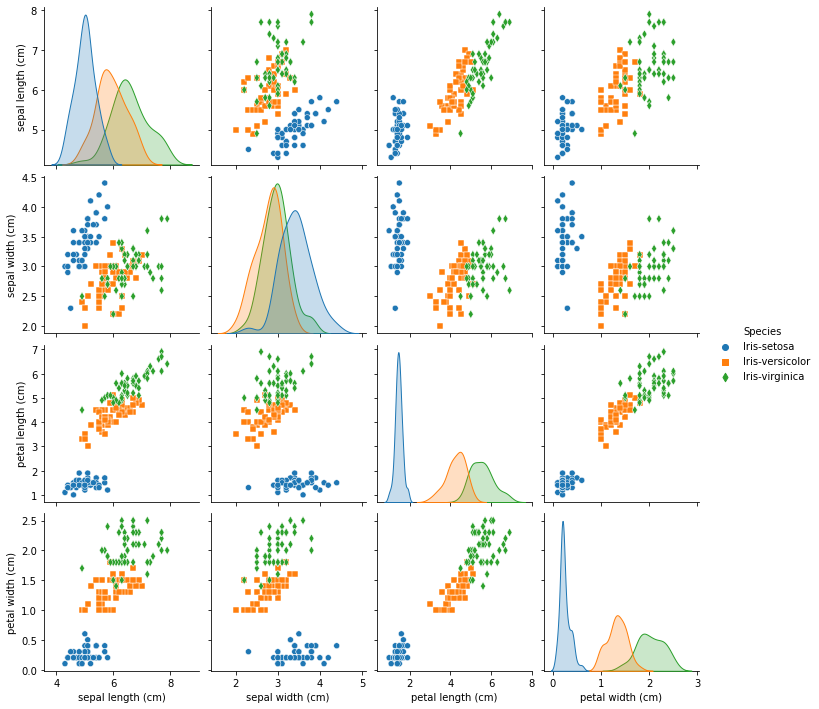

In [7]:
# Pairplot to visualize scatter plots between all columns 
sns.pairplot(data, hue="Species", markers=["o","s","d"])
plt.show()

From above pairplot we can observe that **Iris-setosa** has distinct features in every plot while the other two species are often overlapping.

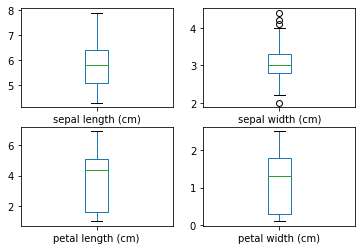

In [8]:
# Boxplot to visualize how the values in the data are spread out
iris_data.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

From the above Boxplots we can see that nearly all the data is between the **inter-quartile range** with a few outliers.

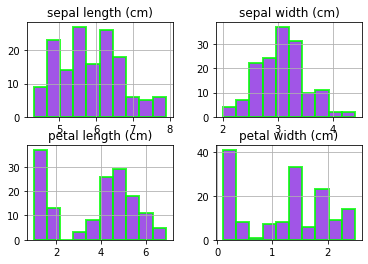

In [9]:
# Histogram to see the data distribution
iris_data.hist(bins=10, color='blueviolet', alpha=0.8, label='Value', edgecolor='lime', linewidth=2)
plt.show()

### Data Preparation
The next step is to divide the data into training and testing sets.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_data,iris_target,test_size=0.2,random_state=0)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


### Decision Tree Classifier Model

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [12]:
Y_pred = model.predict(X_test)

### Model Evaluation & Visualization

In [13]:
print("Classification report:\n",classification_report(Y_test,Y_pred))

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [14]:
print("Accuracy score:",accuracy_score(Y_test,Y_pred))

Accuracy score: 1.0


In [15]:
print(confusion_matrix(Y_test,Y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


From the above confusion matrix and the accuracy score we can conclude that our model is quite accurate.

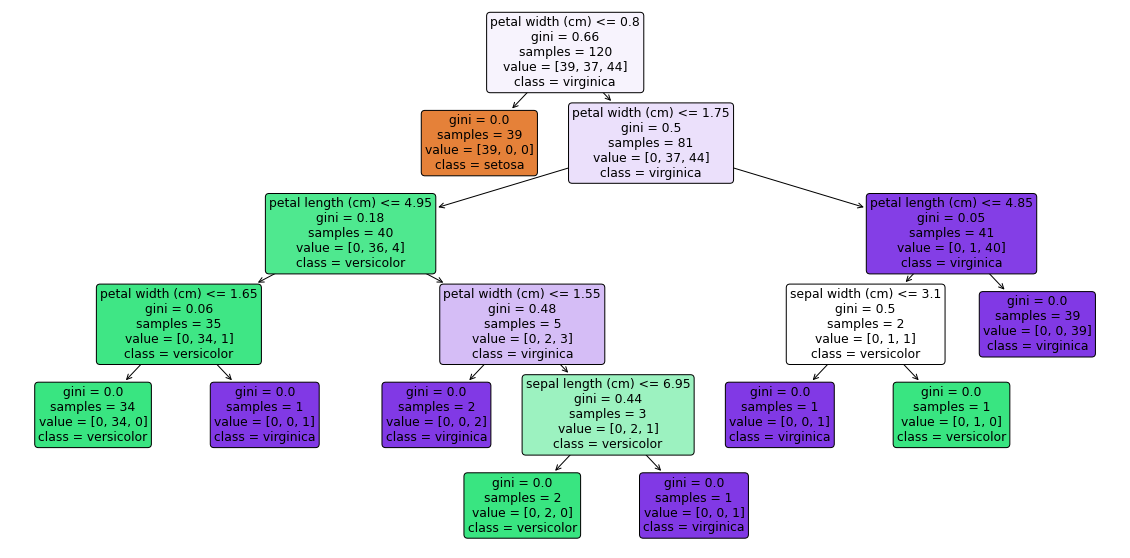

In [16]:
# Visualizing the Decision Tree
fig = plt.figure(figsize=(20,10))
Tree = plot_tree(model, feature_names=iris.feature_names, precision=2,
                 rounded=True, filled=True, class_names=iris.target_names)

In [17]:
fig.savefig("Decision Tree.png")